![Alt text](data/Screenshot%202023-04-03%20100217.png)

In [14]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using CSV
using DataFrames

import Base: tryparse
import Dates: DateTime

  Activating project at `~/Projects/ici-parsing`


In [12]:
@enum Station begin
    RíoSanPedro
    Montecoche
    Grazalema
    Estepona
end


function tryparse(::Type{Station}, s::String)
    if s == "ESTEPONA"
        Estepona::Station
    elseif s == "ES2 - La Teja - Montecoche"
        Montecoche::Station
    else
        nothing
    end
end


data = CSV.File(
    open("data/Grazalema_AEMET_2021-2022.csv");
    normalizenames=true,
    select=[:value, :ts],
    types=Dict(:ts => DateTime),
    dateformat="yyyy-mm-dd HH:MM:SS.s"
) |> DataFrame

Row,value,ts
,Float64,DateTime
1,5.4,2021-01-01T01:00:00
2,4.2,2021-01-01T02:00:00
3,4.1,2021-01-01T03:00:00
4,4.1,2021-01-01T04:00:00
5,3.8,2021-01-01T05:00:00
6,3.3,2021-01-01T06:00:00
7,2.7,2021-01-01T07:00:00
8,2.9,2021-01-01T08:00:00
9,3.6,2021-01-01T09:00:00


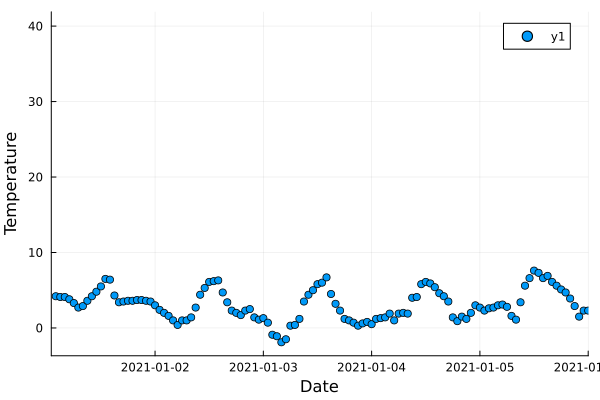

In [36]:
using StatsPlots
using Dates

@df data scatter(
    :ts, 
    :value,
    xlabel = "Date",
    ylabel = "Temperature",
)

(data[1, :ts], data[24*5, :ts]) |> xlims!